## **Diamond Price Prediction using machine learning**
### **AI 4th Semester Project Section A**
### **Student Name:** Hateem Tahir (2023-BS-AI-032)

### Import Pandas for data manipulation

In [18]:
import pandas as pd

### Import Numpy for numerical computations and array manipulations

In [19]:
import numpy as np

### Load the diamonds dataset

In [20]:
data = pd.read_csv("diamonds.csv")

### Print its head(First few rows and columns)

In [21]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [23]:
data.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [25]:
data.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

In [26]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Handling Missing Values

In [27]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Remove the column unnamed from the dataset. 
This coulmn usually exits when a csv file contains an index that Pandas mistakenly treats as a regular column

In [28]:
data = data.drop("Unnamed: 0",axis=1)

### Adding a New Feature: Diamond Size

The following code calculates the volumetric size of each diamond and stores it in a new column, `size"z"]


In [29]:
data["size"] = data["x"] * data["y"] * data["z"]

### Print the diamonds data

In [30]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


### Mapping Diamond Cut Categories to Numerical Values

The following code converts the categorical values in the `cut` column to numerical values for analysis and machine learning.


In [31]:
data["cut"] = data["cut"].map({"Ideal": 1, 
                               "Premium": 2, 
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

## Visualization

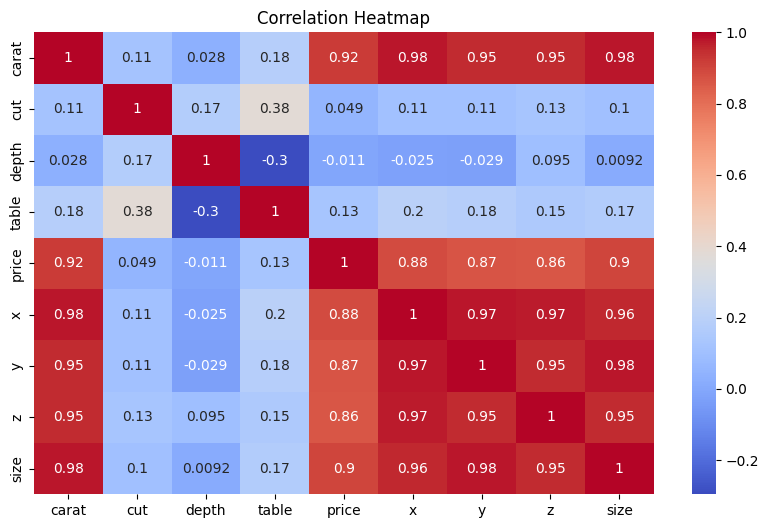

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Correlation

In [33]:
numeric_data = data.select_dtypes(include=[np.number])
print("Correlation matrix:")
print(numeric_data.corr())

Correlation matrix:
          carat       cut     depth     table     price         x         y  \
carat  1.000000  0.114426  0.028224  0.181618  0.921591  0.975094  0.951722   
cut    0.114426  1.000000  0.169916  0.381988  0.049421  0.105361  0.105319   
depth  0.028224  0.169916  1.000000 -0.295779 -0.010647 -0.025289 -0.029341   
table  0.181618  0.381988 -0.295779  1.000000  0.127134  0.195344  0.183760   
price  0.921591  0.049421 -0.010647  0.127134  1.000000  0.884435  0.865421   
x      0.975094  0.105361 -0.025289  0.195344  0.884435  1.000000  0.974701   
y      0.951722  0.105319 -0.029341  0.183760  0.865421  0.974701  1.000000   
z      0.953387  0.126726  0.094924  0.150929  0.861249  0.970772  0.952006   
size   0.976308  0.101119  0.009157  0.167400  0.902385  0.956564  0.975143   

              z      size  
carat  0.953387  0.976308  
cut    0.126726  0.101119  
depth  0.094924  0.009157  
table  0.150929  0.167400  
price  0.861249  0.902385  
x      0.970772  0.95

## Outlier Detection

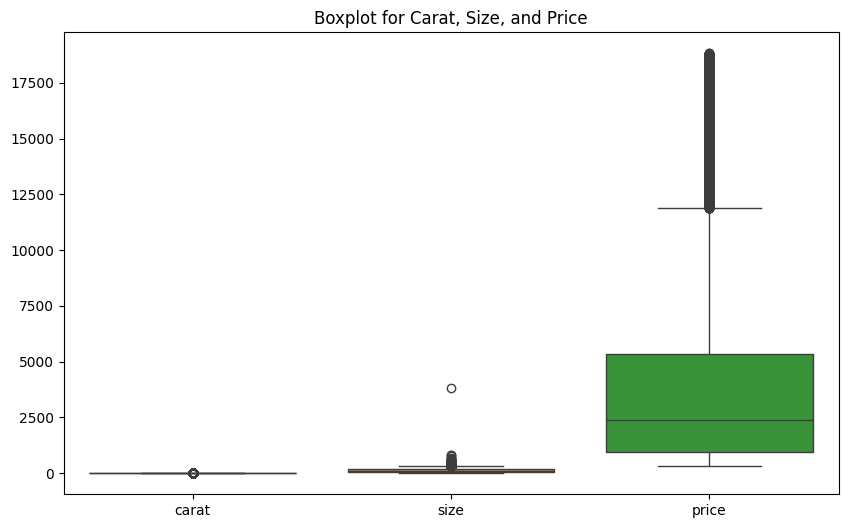

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data[["carat", "size", "price"]])
plt.title("Boxplot for Carat, Size, and Price")
plt.show()

### Splitting the Dataset into Training and Testing Sets

- Splits the dataset into training and testing sets for machine learning.
-  Purpose is to help evaluate the model's performance on unseen data (testing set) after training it on the training set


In [35]:
from sklearn.model_selection import train_test_split
x = np.array(data[["carat", "cut", "size"]])
y = np.array(data[["price"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)
lr_preds = lr_model.predict(xtest)

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain, ytrain)
dt_preds = dt_model.predict(xtest)

### Training the Random Forest Regressor

- Trains a machine learning model using the Random Forest Regressor algorithm.
- RandomForestRegressor is an ensemble learning method that combines multiple decision trees to make robust and accurate predictions.
- The trained Random Forest Regressor will predict diamond prices based on the input features.

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
rf_preds = rf_model.predict(xtest)

C:\Users\iCare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Evaluation Metrics

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, ytrue, ypred):
    print(f"--- {name} ---")
    print("MAE:", mean_absolute_error(ytrue, ypred))
    print("MSE:", mean_squared_error(ytrue, ypred))
    print("RMSE:", np.sqrt(mean_squared_error(ytrue, ypred)))
    print("R^2 Score:", r2_score(ytrue, ypred))
    print()

evaluate_model("Linear Regression", ytest, lr_preds)
evaluate_model("Decision Tree", ytest, dt_preds)
evaluate_model("Random Forest", ytest, rf_preds)


--- Linear Regression ---
MAE: 1006.4775649095034
MSE: 2402136.5053358646
RMSE: 1549.8827392212174
R^2 Score: 0.8512284941934997

--- Decision Tree ---
MAE: 916.8491489706115
MSE: 3200384.4093692666
RMSE: 1788.961824458327
R^2 Score: 0.8017906115310706

--- Random Forest ---
MAE: 792.4480653190499
MSE: 2032730.191366977
RMSE: 1425.7384722897034
R^2 Score: 0.8741069332253798



### Predicting the price

- Price will be predicted  based on user inputs for carat size, cut type, and size.
- The selected inputs carat size, cut type, and size  are combined into a feature array for the purpose of processing of transforming input data (features) into a format suitable for machine learning models..

In [40]:
print("Diamond Price Prediction")

carat_options = [0.5, 1.0, 1.5, 2.0, 2.5]
print("Carat Size Options:")
for i, option in enumerate(carat_options, 1):
    print(f"{i}. {option}")
carat_choice = int(input("Choose Carat Size (Enter the number): "))
a = carat_options[carat_choice - 1]  

cut_options = {"Ideal": 1, "Premium": 2, "Good": 3, "Very Good": 4, "Fair": 5}
print("Cut Type Options:")
for cut, value in cut_options.items():
    print(f"{value}. {cut}")
b = int(input("Choose Cut Type (Enter the number): "))

size_options = [50.0, 100.0, 150.0, 200.0, 250.0]
print("Size Options:")
for i, option in enumerate(size_options, 1):
    print(f"{i}. {option}")
size_choice = int(input("Choose Size (Enter the number): "))
c = size_options[size_choice - 1] 

features = np.array([[a, b, c]])
print("Predicted Diamond's Price = $", rf_model.predict(features))


Diamond Price Prediction
Carat Size Options:
1. 0.5
2. 1.0
3. 1.5
4. 2.0
5. 2.5
Cut Type Options:
1. Ideal
2. Premium
3. Good
4. Very Good
5. Fair
Size Options:
1. 50.0
2. 100.0
3. 150.0
4. 200.0
5. 250.0
Predicted Diamond's Price = $ [6130.57]
